# Implementing Support Vector Machines

![SVM](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/svm.png?raw=true)


## support Vector Machine(SVM) - An introduction

— In this exploration of Linear Support Vector Machines (SVMs), we programming,math, and machine learning to solve various efficiently.

We'll tackle the primal optimization problem using quadratic programming techniques, ensuring our SVMs are resilient. Additionally, the Dual Problem and Karush-Kuhn-Tucker (KKT) conditions will be discussed for a deeper understanding.

Our focus is not solely theoretical, therefore we will have to derive mathematical equations and also implement them into a framework. This endeavor will be accompanied by an extensive report following a specific format. Additionally, we will utilize a dataset to validate our algorithm by reporting its benchmarks across various metrics.

Furthermore, we’ll delve into Kernel SVM and multi-class SVM to showcase their capabilities beyond the fundamental applications.

![SVM](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/svm2.png?raw=true)

Support Vector Machines (SVM), developed by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963, are powerful tools in machine learning. They work by drawing precise lines, called hyperplanes, to separate different groups within data. These lines aim to maximize the space between groups, and the support vectors are crucial in determining their placement.

SVMs are adept at handling both simple and complex data patterns, making them invaluable for tackling real-world problems. They excel across diverse datasets, providing accurate predictions with high reliability.

## What will you learn in the course of this journey?


*   Mastery of the Python functionality cvxopt.solvers.qp for primal and dual
*   Understanding the nuances of strong duality in SVM,
*   Benchmarking classifications in a systematic manner,
*   Implementation of Kernel SVM for non-linear data,
*   Application of max-margin method for Multiclass SVM

## Project Definition

### 1. Dataset

In [ ]:
# Import neccessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

For This project we will use the famous “Iris” dataset  [[Link]](https://archive.ics.uci.edu/dataset/53/iris), This dataset contains measurements of three iris species - Setosa, Versicolour, and Virginica. The measurements consist of petal length and width as well as sepal length and width for 150 iris samples. These measurements are stored in a 150x4 NumPy array, with each row representing an individual sample and the columns representing: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm. By analyzing these quantitative measurements, one can differentiate between the three iris species.

![Iris](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/dataset.jpg?raw=true)

You will be provided with a script, which will preprocess this dataset for a binary classification task. We kindly ask you not to change the random_state argument inside the function.

In [ ]:
def load_split_dataset():
    iris = load_iris()
    x = iris.data
    y = iris.target
    class_1 = 1
    class_2 = 2
    binary_x = x[(y == class_1) | (y == class_2)]
    binary_y = y[(y == class_1) | (y == class_2)]
    label_encoder = LabelEncoder()
    binary_y = label_encoder.fit_transform(binary_y)
    x_train, x_test, y_train, y_test = train_test_split(binary_x, binary_y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test


if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_split_dataset()

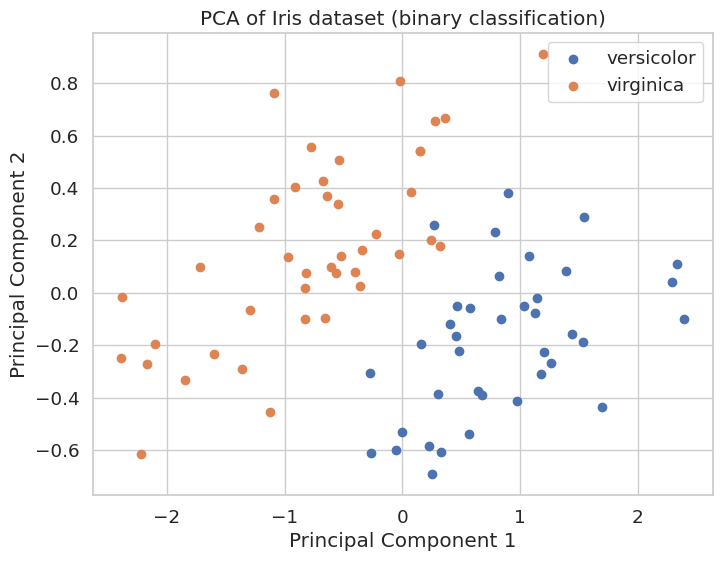

In [ ]:
def visualize_binary_classification(X_train, y_train, y_pred, class_labels):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)

    plt.figure(figsize=(8, 6))
    for i, target_name in zip([0, 1], class_labels):
        plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name)
    plt.title('PCA of Iris dataset (binary classification)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    iris = load_iris()
    X = iris.data
    y = iris.target
    class_1 = 1
    class_2 = 2
    binary_X = X[(y == class_1) | (y == class_2)]
    binary_y = y[(y == class_1) | (y == class_2)]
    label_encoder = LabelEncoder()
    binary_y = label_encoder.fit_transform(binary_y)
    X_train, X_test, y_train, y_test = train_test_split(binary_X, binary_y, test_size=0.2, random_state=42)

    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_train)

    visualize_binary_classification(X_train, y_train, y_pred, iris.target_names[class_1:class_2 + 1])


We can also test the implemented algorithms to avoid complexity and computational error on the following toy datasets. The first dataset is simply separable and the second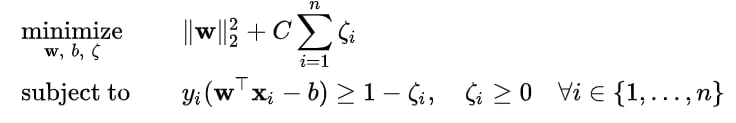 dataset is for when we use slack variables:



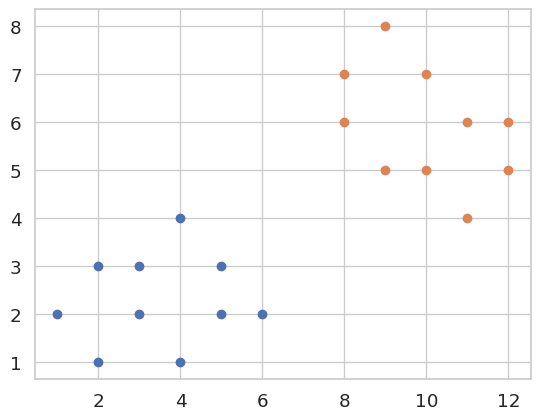

In [ ]:
without_slack_toy = np.array([[1., 2., 0.], [2., 3., 0.], [3., 3., 0.],
 [4., 4., 0.], [2., 1., 0.], [3., 2., 0.], [4., 1., 0.], [5., 2., 0.],
  [6., 2., 0.], [5., 3., 0.], [ 8.,  7.,  1.], [ 9.,  8.,  1.], [10.,  7.,  1.],
   [11.,  6.,  1.], [ 9.,  5.,  1.], [ 8.,  6.,  1.], [10.,  5.,  1.],
    [11.,  4.,  1.], [12.,  5.,  1.], [12.,  6.,  1.]])

plt.scatter(without_slack_toy[:10, 0], without_slack_toy[:10, 1])
plt.scatter(without_slack_toy[10:, 0], without_slack_toy[10:, 1])

plt.show()

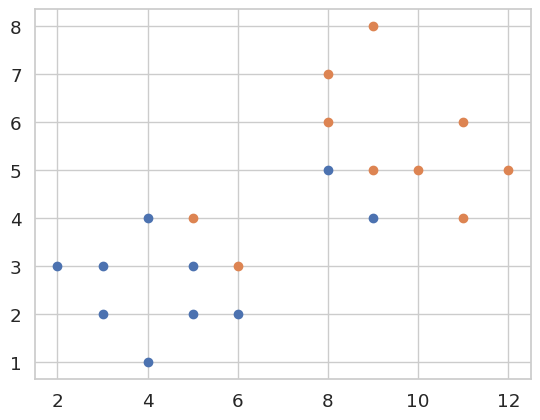

In [ ]:
with_slack_toy = np.array([[9., 4., 0.], [2., 3., 0.], [3., 3., 0.],
 [4., 4., 0.], [8., 5., 0.], [3., 2., 0.], [4., 1., 0.], [5., 2., 0.],
  [6., 2., 0.], [5., 3., 0.], [ 8.,  7.,  1.], [ 9.,  8.,  1.], [ 5.,  4.,  1.],
   [11.,  6.,  1.], [ 9.,  5.,  1.], [ 8.,  6.,  1.], [10.,  5.,  1.],
    [11.,  4.,  1.], [12.,  5.,  1.], [ 6.,  3.,  1.]])

plt.scatter(with_slack_toy[:10, 0], with_slack_toy[:10, 1])
plt.scatter(with_slack_toy[10:, 0], with_slack_toy[10:, 1])

plt.show()

### 2. Linear SVM by The Primal Problem

In this part, our objective is to complete the implementation of the linearـsvm primal algorithm.

      def linear_svm_primal(X, y, C):
   		# TODO: Solve the quadratic programming problem
   		# TODO: Extract solution
   		# TODO: Return weights, bias and slack variables

Where X is a m×n 2D numpy array representing m data points each of dimension n, y is the m_dimensional vector (1D array of size m) that contains labels, and C denotes the slack parameter. Your job is to reformulate the [primal problem](https://en.wikipedia.org/wiki/Support_vector_machine#Soft-margin)

![Primal](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/primal.png?raw=true)

in the matrix form required by cvxopt.solvers.qp. The function is expected to return an n-dimensional vector of weights, a scalar bias, and a vector of slack parameters.

#### 2.1 Introduction

Convex optimization problems is in the following form:

![QP](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/qp.png?raw=true)

We need to obtain the values of P, q, G, h, A, b based on the provided formula. Let's Consider

![X](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/x.png?raw=true)

and substitute in above formula.

![Reformulation](https://github.com/mohamadam79/Implementing-Support-Vector-Machines/blob/main/images/reformulation.png?raw=true)

#### 2.2 Implementation

For implementation, we finalize the linear_svm_primal function.

In [ ]:
def solve_svm_primal(X, y, C):
    """
    Solve SVM primal problem with slack variables using cvxopt.

    Parameters:
    - X: Input data matrix (each row is a data point)
    - y: Labels (1 or -1) corresponding to the data points
    - C: Regularization parameter

    Returns:
    - weights: Optimal weights
    - bias: Optimal bias
    - slack_variables: Slack variables
    """

    n, d = X.shape

    # Construct the matrices and vectors for the QP problem
    P = matrix(np.block([[np.eye(d), np.zeros((d, 1 + n))], [np.zeros((1 + n, d + 1 + n))]]))

    q = matrix(np.vstack([np.zeros((d + 1, 1)), C * np.ones((n, 1))]))

    G = matrix(np.vstack((np.hstack((np.vstack([-y[i] * np.hstack([X[i, :], 1]) for i in range(n)]), -np.eye(n, n))),
                          np.hstack((np.zeros((n, d + 1)), -np.eye(n, n))))))

    h = matrix(np.vstack((-np.ones((n, 1)), np.zeros((n, 1)))))

    # Solve the QP problem
    sol = solvers.qp(P, q, G, h)

    # Extract the optimal solution
    optimal_solution = np.array(sol['x'])

    # Extract weights, bias, and slack variables
    weights = optimal_solution[:d]
    bias = optimal_solution[d]
    slack_variables = optimal_solution[d + 1:]

    return weights, bias, slack_variables

#### 2.3 Evaluation

Define the predict function to predict the class of data.

In [ ]:
def predict(X, w, b):
    # Calculate the decision function
    decision_function = np.dot(X, w) + b
    # Classify based on the sign of the decision function
    predictions = np.sign(decision_function)
    return np.squeeze(predictions)

Define the evalution function to evaluate the model.

In [ ]:
def evaluation(y, y_pred, phase):
    accuracy = np.mean(y_pred == y)
    cm = confusion_matrix(y, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot()
    disp.ax_.set_title(f"{phase} confusion matrix")
    plt.show()

    print(f"{phase}:")
    print("Accuracy:", accuracy)

    if len(np.unique(y)) == 2:
        print(
            f"Class 1 - Precision: {precision_score(y, y_pred, average=None)[0]}, Recall: {recall_score(y, y_pred, average=None)[0]}, F1-score: {f1_score(y, y_pred, average=None)[0]}")
        print(
            f"Class 2 - Precision: {precision_score(y, y_pred, average=None)[1]}, Recall: {recall_score(y, y_pred, average=None)[1]}, F1-score: {f1_score(y, y_pred, average=None)[1]}")
    elif len(np.unique(y)) == 3:
        print(
            f"Class 1 - Precision: {precision_score(y, y_pred, average=None)[0]}, Recall: {recall_score(y, y_pred, average=None)[0]}, F1-score: {f1_score(y, y_pred, average=None)[0]}")
        print(
            f"Class 2 - Precision: {precision_score(y, y_pred, average=None)[1]}, Recall: {recall_score(y, y_pred, average=None)[1]}, F1-score: {f1_score(y, y_pred, average=None)[1]}")
        print(
            f"Class 3 - Precision: {precision_score(y, y_pred, average=None)[2]}, Recall: {recall_score(y, y_pred, average=None)[1]}, F1-score: {f1_score(y, y_pred, average=None)[2]}")

Model evaluation on without_slack_toy dataset.

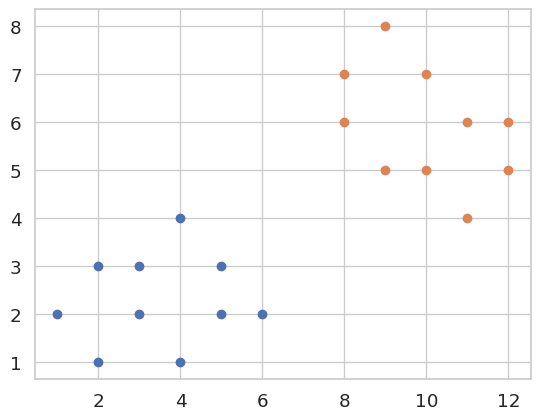

In [ ]:
plt.scatter(without_slack_toy[:10, 0], without_slack_toy[:10, 1])
plt.scatter(without_slack_toy[10:, 0], without_slack_toy[10:, 1])

plt.show()

     pcost       dcost       gap    pres   dres
 0: -7.1645e+00  4.3595e+00  3e+01  3e+00  6e-16
 1:  3.9694e+00  4.8476e+00  2e+00  2e-01  4e-16
 2:  5.8518e+00  5.8945e+00  4e-01  3e-02  9e-16
 3:  6.0874e+00  6.0782e+00  3e-02  1e-03  2e-15
 4:  6.0901e+00  6.0892e+00  1e-03  2e-05  9e-15
 5:  6.0898e+00  6.0897e+00  9e-05  8e-08  5e-13
 6:  6.0897e+00  6.0897e+00  4e-06  2e-16  6e-12
Optimal solution found.
Optimal Weights: [[2.08083828]
 [1.84448239]]
Optimal Bias: [-1.90524975]
Slack Variables: [[6.29314029e-09]
 [6.29314759e-09]
 [7.94618381e-05]
 [4.52744062e-01]
 [6.29314000e-09]
 [6.29314448e-09]
 [6.29314284e-09]
 [1.14916209e-01]
 [3.04083325e-01]
 [3.78413694e-01]
 [9.50338993e-05]
 [6.29314146e-09]
 [6.29314228e-09]
 [6.29314353e-09]
 [3.37922887e-01]
 [2.63592518e-01]
 [1.48755771e-01]
 [2.23086139e-01]
 [6.29314564e-09]
 [6.29314113e-09]]


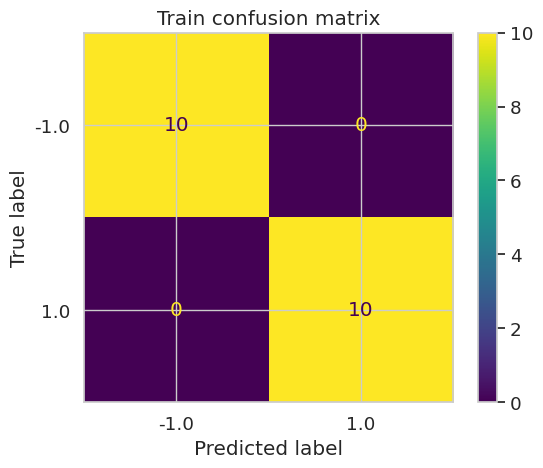

Train:
Accuracy: 1.0
Class 1 - Precision: 1.0, Recall: 1.0, F1-score: 1.0
Class 2 - Precision: 1.0, Recall: 1.0, F1-score: 1.0


In [ ]:
# load without_slack data
X = without_slack_toy[:, :-1]
y = without_slack_toy[:, -1]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X = scaler.fit_transform(X)

y[y == 0] = -1

C = 1.0

# Solve the SVM primal problem
w, b, s = solve_svm_primal(X, y, C)

# Print the results
print("Optimal Weights:", w)
print("Optimal Bias:", b)
print("Slack Variables:", s)

y_pred = predict(X, w, b)

# Calculate accuracy
evaluation(y, y_pred, 'Train')

Model evaluation on with_slack_toy dataset.

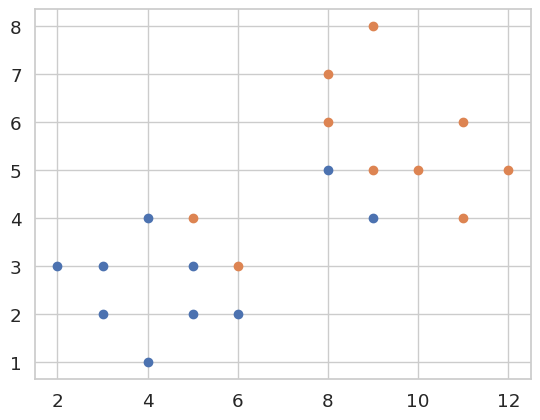

In [ ]:
plt.scatter(with_slack_toy[:10, 0], with_slack_toy[:10, 1])
plt.scatter(with_slack_toy[10:, 0], with_slack_toy[10:, 1])

plt.show()

     pcost       dcost       gap    pres   dres
 0: -3.4304e+00  3.5054e+01  1e+02  3e+00  3e+00
 1:  2.5022e+01  9.0101e+00  2e+01  5e-16  1e-15
 2:  1.1872e+01  1.0140e+01  2e+00  3e-16  3e-16
 3:  1.1451e+01  1.1094e+01  4e-01  2e-16  2e-15
 4:  1.1332e+01  1.1302e+01  3e-02  3e-16  2e-15
 5:  1.1320e+01  1.1320e+01  6e-04  2e-16  2e-14
 6:  1.1320e+01  1.1320e+01  6e-06  3e-16  8e-14
Optimal solution found.
Optimal Weights: [[1.70001539]
 [1.57143502]]
Optimal Bias: [-1.52282533]
Slack Variables: [[1.34065768e+00]
 [7.95439484e-08]
 [9.61576749e-02]
 [4.90649946e-01]
 [1.39514686e+00]
 [8.19566103e-08]
 [7.40898071e-08]
 [2.11670109e-01]
 [3.81671594e-01]
 [4.36160769e-01]
 [1.55871898e-01]
 [6.52141109e-08]
 [1.33934865e+00]
 [8.55320025e-08]
 [4.34851744e-01]
 [3.80362569e-01]
 [2.64850238e-01]
 [3.19339402e-01]
 [7.96402181e-08]
 [1.39383783e+00]]


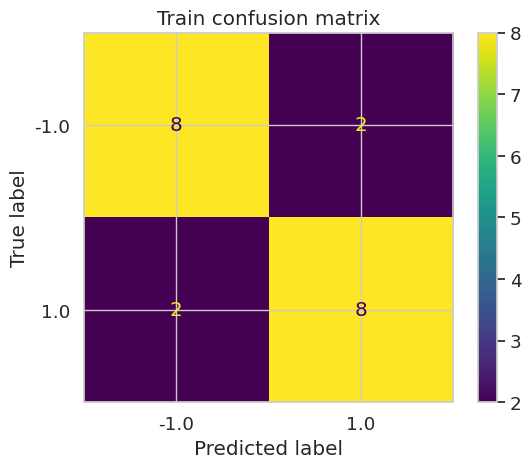

Train:
Accuracy: 0.8
Class 1 - Precision: 0.8, Recall: 0.8, F1-score: 0.8000000000000002
Class 2 - Precision: 0.8, Recall: 0.8, F1-score: 0.8000000000000002


In [ ]:
# load without_slack data
X = with_slack_toy[:, :-1]
y = with_slack_toy[:, -1]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X = scaler.fit_transform(X)

y[y == 0] = -1

C = 1.0

# Solve the SVM primal problem
w, b, s = solve_svm_primal(X, y, C)

# Print the results
print("Optimal Weights:", w)
print("Optimal Bias:", b)
print("Slack Variables:", s)

y_pred = predict(X, w, b)

# Calculate accuracy
evaluation(y, y_pred, 'Train')

Model evaluation on Iris dataset.

     pcost       dcost       gap    pres   dres
 0: -3.8726e+01  1.2791e+02  5e+02  3e+00  5e+00
 1:  7.9792e+01  1.4346e+01  7e+01  3e-02  4e-02
 2:  3.0591e+01  2.0587e+01  1e+01  5e-03  6e-03
 3:  2.6607e+01  2.4107e+01  3e+00  7e-04  1e-03
 4:  2.5644e+01  2.4936e+01  7e-01  1e-04  1e-04
 5:  2.5292e+01  2.5176e+01  1e-01  9e-06  1e-05
 6:  2.5229e+01  2.5225e+01  4e-03  2e-07  2e-07
 7:  2.5227e+01  2.5227e+01  2e-04  6e-09  9e-09
 8:  2.5227e+01  2.5227e+01  2e-06  6e-11  9e-11
Optimal solution found.
Optimal Weights: [[-3.08981944]
 [ 2.85925079]]
Optimal Bias: [0.18084732]
Slack Variables: [[8.40509450e-09]
 [6.24268437e-01]
 [2.61390970e-01]
 [8.43966084e-09]
 [1.27398718e+00]
 [9.61023317e-02]
 [8.45336877e-09]
 [2.82404164e-01]
 [8.84240643e-02]
 [8.43873065e-09]
 [3.70916394e-01]
 [8.50663920e-09]
 [8.35450806e-09]
 [4.83504751e-01]
 [8.36883397e-09]
 [8.42571800e-09]
 [4.05953391e-01]
 [8.40278864e-09]
 [7.09552685e-01]
 [5.18601459e-01]
 [8.43455407e-09]
 [5.39648699e-01]

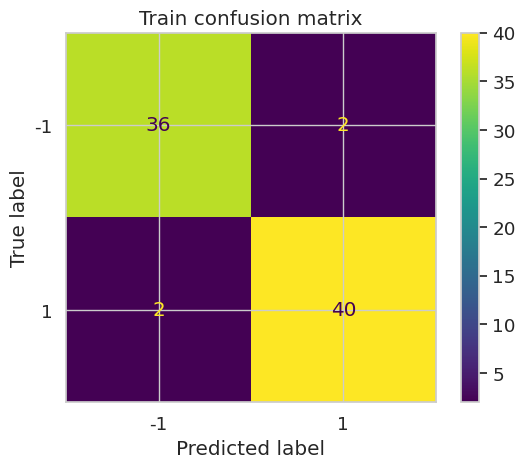

Train:
Accuracy: 0.95
Class 1 - Precision: 0.9473684210526315, Recall: 0.9473684210526315, F1-score: 0.9473684210526315
Class 2 - Precision: 0.9523809523809523, Recall: 0.9523809523809523, F1-score: 0.9523809523809523


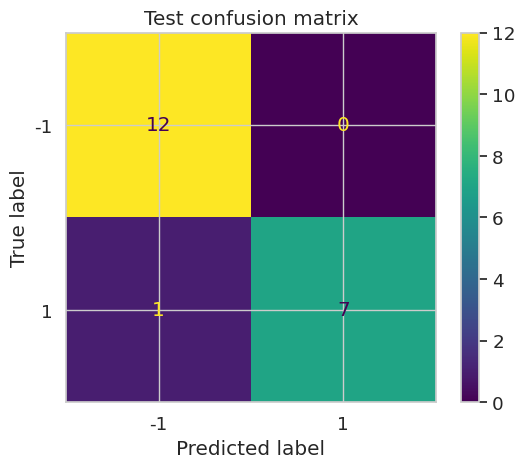

Test:
Accuracy: 0.95
Class 1 - Precision: 0.9230769230769231, Recall: 1.0, F1-score: 0.9600000000000001
Class 2 - Precision: 1.0, Recall: 0.875, F1-score: 0.9333333333333333


In [ ]:
X_train, X_test, y_train, y_test = load_split_dataset()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

C = 1.0

# Solve the SVM primal problem
w, b, s = solve_svm_primal(X_train, y_train, C)

# Print the results
print("Optimal Weights:", w)
print("Optimal Bias:", b)
print("Slack Variables:", s)

y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

# Calculate accuracy
evaluation(y_train, y_pred_train, 'Train')
evaluation(y_test, y_pred_test, 'Test')